# Decision Tree

## without applying PCA

### Applying GridSearch to find the best min sample leaf and max depth for decision tree using gini impurity

In [5]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('cleaned_filename.csv')

In [6]:
# defining X,y dataframe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# scaling
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler --> then easy to find best K-factor when the data is scaled to have a standard range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Define a range of values for max_depth and min_samples_leaf to test
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [10]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier with Gini impurity as the splitting criterion
model1 = DecisionTreeClassifier(criterion='gini')

In [11]:
# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [12]:
# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1}
Best accuracy score: 0.9100180334301877


### evaluation

In [13]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=9, min_samples_leaf=1)

In [14]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [15]:
# train accuracy
print('training score - ',end='')
model1.score(X_train,y_train)

training score - 

0.9542619542619543

In [16]:
# test accuracy
print('testing score - ',end='')
model1.score(X_test,y_test)

testing score - 

0.9239904988123515

##### confusion matrix

In [17]:
y_predicted = model1.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(60.222222222222214, 0.5, 'Truth')

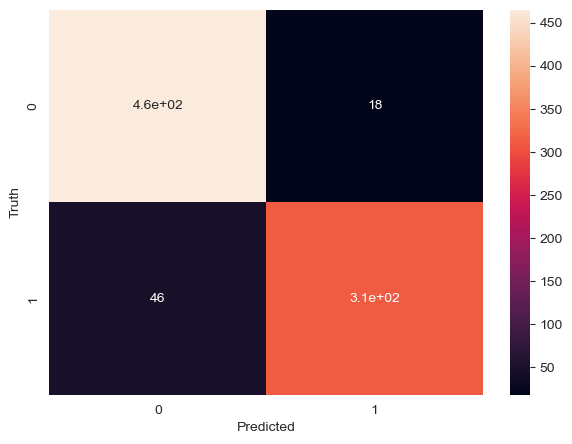

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       483
           1       0.95      0.87      0.91       359

    accuracy                           0.92       842
   macro avg       0.93      0.92      0.92       842
weighted avg       0.93      0.92      0.92       842



### Applying GridSearch to find the best min sample leaf and max depth for decision tree using entropy

In [21]:
model2 = DecisionTreeClassifier(criterion='entropy')

In [22]:
# Define a range of values for max_depth and min_samples_leaf to test
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [23]:
# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [24]:
# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2}
Best accuracy score: 0.9129884788867775


### evaluation

In [25]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=2)

In [26]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2)

In [27]:
# train accuracy
print('training score - ',end='')
model2.score(X_train,y_train)

training score - 

0.9408969408969409

In [28]:
# train accuracy
print('testing score - ',end='')
model2.score(X_test,y_test)

testing score - 

0.9097387173396675

#### confusion matrix

In [30]:
y_predicted = model2.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(60.222222222222214, 0.5, 'Truth')

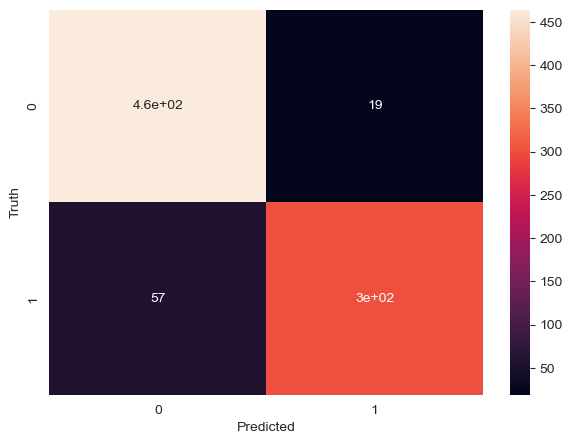

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       483
           1       0.94      0.84      0.89       359

    accuracy                           0.91       842
   macro avg       0.92      0.90      0.91       842
weighted avg       0.91      0.91      0.91       842



### ROC curve for both model1 and model2

##### for model1

In [34]:
# predict probabilities on test set
y_pred_prob1 = model1.predict_proba(X_test)[:, 1]

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
model1_fpr, model1_tpr, thresholds = roc_curve(y_test, y_pred_prob1)
model1_roc_auc = auc(model1_fpr, model1_tpr)

##### for model2

In [36]:
# predict probabilities on test set
y_pred_prob2 = model2.predict_proba(X_test)[:, 1]

In [37]:
# Calculate ROC curve and AUC
model2_fpr, model2_tpr, thresholds = roc_curve(y_test, y_pred_prob2)
model2_roc_auc = auc(model2_fpr, model2_tpr)

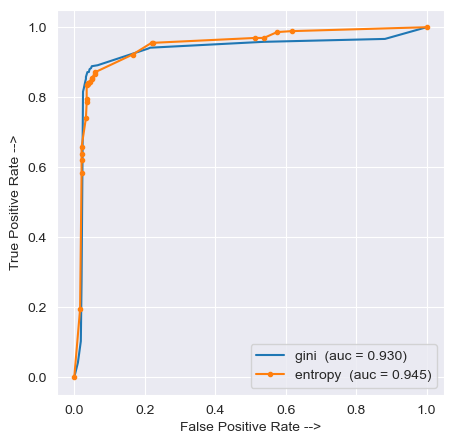

In [39]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(model1_fpr, model1_tpr, linestyle='-', label='gini  (auc = %0.3f)' % model1_roc_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label='entropy  (auc = %0.3f)' % model2_roc_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()